In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_context('poster'); plt.style.use('fivethirtyeight')

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
# Downloaded CSV for all complaints with a narrative from import matplotlib.pyplot as plt
df = pd.read_csv('raw/Consumer_Complaints_with_Consumer_Complaint_Narratives.csv', index_col='Complaint ID')

In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,
1744207,01/15/2016,Credit reporting,NaN,Incorrect information on credit report,Public record,"A public record still on my account,, I paid o...",Company chooses not to provide a public response,TransUnion,CA,913XX,Web,01/15/2016,Closed with non-monetary relief,Yes,No
1745609,01/15/2016,Credit card,NaN,Other,NaN,Home Depot habitually credits my account a wee...,Company chooses not to provide a public response,Citibank,AZ,852XX,Web,01/15/2016,Closed with monetary relief,Yes,No
1746078,01/15/2016,Bank account or service,Checking account,"Account opening, closing, or management",NaN,My eight years account with Bank of America wa...,Company chooses not to provide a public response,Bank of America,VA,238XX,Web,01/15/2016,Closed with monetary relief,Yes,No
1744866,01/15/2016,Debt collection,Credit card,False statements or representation,Indicated committed crime not paying,California XXXX XXXX XXXX XXXX XXXX called and...,Company chooses not to provide a public response,Citibank,KY,402XX,Web,01/15/2016,Closed with explanation,Yes,No
1745082,01/15/2016,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,I was paying out a credit card with a balance ...,Company chooses not to provide a public response,Citibank,TX,750XX,Web,01/15/2016,Closed with non-monetary relief,Yes,No


In [57]:
temp = pd.DataFrame(df.groupby(['Company']).count().iloc[:,0]).reset_index()

In [58]:
large_companies = temp[temp['Date received'] > 400]['Company'].values

In [59]:
filtered = df[[x in large_companies for x in df['Company']]]

In [46]:
temp = filtered.groupby(['Company','Company response to consumer']).count().iloc[:,0].reset_index()

In [50]:
temp = temp.pivot(index='Company',columns='Company response to consumer').fillna(0)

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

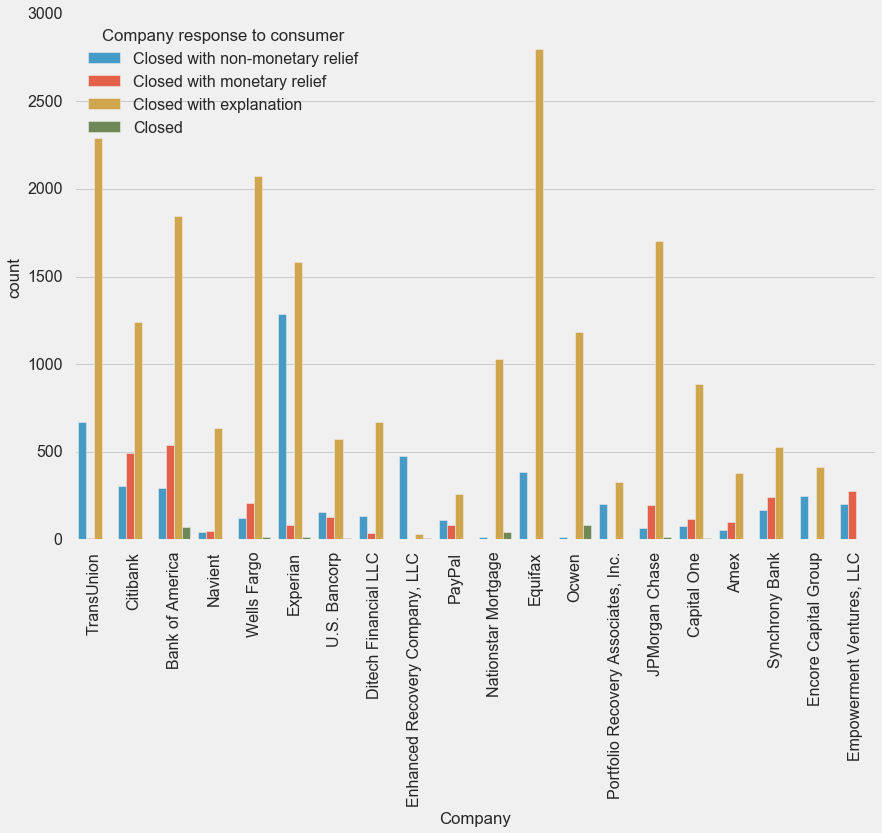

In [62]:
sns.countplot(x=filtered['Company'], hue=filtered['Company response to consumer'])
plt.xticks(rotation='vertical')

In [37]:
df.shape

(50631, 15)

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


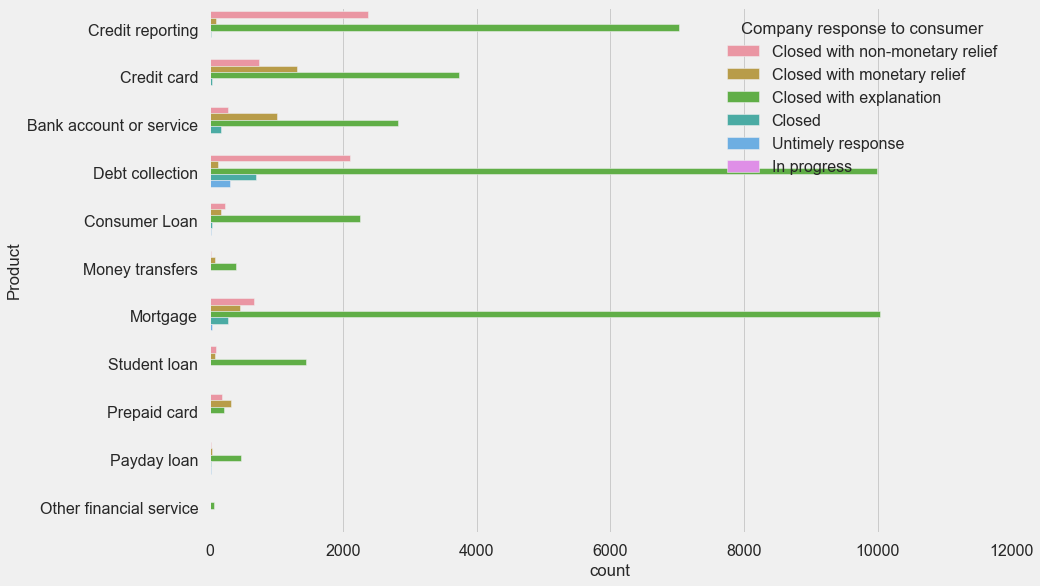

In [66]:
sns.countplot(y=df['Product'], hue=df['Company response to consumer'])
# plt.xticks(rotation='vertical')

In [73]:
df[df['Product'] == 'Credit card']['Company response to consumer'].value_counts()

Closed with explanation            3739
Closed with monetary relief        1315
Closed with non-monetary relief     736
Closed                               33
Untimely response                     3
Name: Company response to consumer, dtype: int64

In [77]:
df[df['Product'] == 'Credit card']

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,
1745609,01/15/2016,Credit card,NaN,Other,NaN,Home Depot habitually credits my account a wee...,Company chooses not to provide a public response,Citibank,AZ,852XX,Web,01/15/2016,Closed with monetary relief,Yes,No
1746191,01/15/2016,Credit card,NaN,Billing statement,NaN,Dear representatives of The Consumer Financial...,Company chooses not to provide a public response,Citibank,NY,112XX,Web,01/15/2016,Closed with explanation,Yes,Yes
1741441,01/15/2016,Credit card,NaN,Credit determination,NaN,I applied for a credit card with USAA and I wa...,Company believes it acted appropriately as aut...,USAA Savings,CA,913XX,Web,01/15/2016,Closed with explanation,Yes,No
1742276,01/15/2016,Credit card,NaN,Delinquent account,NaN,I believe what happened was a system error. I ...,Company chooses not to provide a public response,U.S. Bancorp,CA,949XX,Web,01/15/2016,Closed with explanation,Yes,No
1741325,01/15/2016,Credit card,NaN,Bankruptcy,NaN,I filed a Ch. XXXX Bankruptcy in the XXXX XXXX...,Company chooses not to provide a public response,Bank of America,CA,921XX,Web,01/15/2016,Closed with non-monetary relief,Yes,Yes
1742048,01/15/2016,Credit card,NaN,Advertising and marketing,NaN,I applied and got approved for USAA XXXX World...,Company believes complaint is the result of an...,USAA Savings,TX,765XX,Web,01/15/2016,Closed with monetary relief,Yes,No
1740741,01/15/2016,Credit card,NaN,Other,NaN,Applied and was approved for Citi AAdvantage P...,Company chooses not to provide a public response,Citibank,SD,571XX,Web,01/15/2016,Closed with explanation,Yes,No
1741212,01/14/2016,Credit card,NaN,Rewards,NaN,I did n't receive my {$25.00} reward from the ...,Company chooses not to provide a public response,Bank of America,MA,021XX,Web,01/14/2016,Closed with explanation,Yes,No
1740698,01/14/2016,Credit card,NaN,Billing disputes,NaN,I wish to have your assistance in disputing XX...,Company chooses not to provide a public response,Wells Fargo,MN,553XX,Web,01/14/2016,Closed with explanation,Yes,No


In [ ]:
# Note to self:  Let's focus in on the more specific ? of "Predict whether you'll get relief (either non-monetary
# or monetary) given a credit card narrative -- i.e., what words really help you out there